

> **AUTHOR** : Ritika Gupta<br>
**OBJECTIVE** : To classify online games as safe or unsafe based on reviews.








In [4]:
!pip install contractions

     |████████████████████████████████| 284 kB 8.5 MB/s 
     |████████████████████████████████| 106 kB 52.0 MB/s 


In [32]:
import pandas as pd 
import numpy as np
#----------For EDA ------------
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#------- For Preprocessing Text Data--------
import re
import contractions
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
#----------For Splitting DataSet 
from sklearn.model_selection import train_test_split

#-------For Word Vectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#-------For Model Building
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics  import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
data=pd.read_csv('game_reviews.csv')
data.head()

,author age,recommended age,review
0,"Teen, 17 years old",age 7+,Kids dont listent to the parents saying ''ThIs...
1,"Kid, 11 years old",age 2+,I have been playing this game for many years a...
2,"Kid, 12 years old",age 7+,The game is great with no true inappropriate t...
3,"Teen, 13 years old",age 5+,Are you sure you got common sense. I would giv...
4,"Kid, 10 years old",age 5+,IDK WHAT TO SAY BUT DIS IS DA BEST GAME EVA


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 560
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author age       526 non-null    object
 1   recommended age  526 non-null    object
 2   review           526 non-null    object
 3   target           526 non-null    int64 
 4   clean_review     526 non-null    object
dtypes: int64(1), object(4)
memory usage: 24.7+ KB


In [8]:
#Drop Missing Values from Reviews 
data=data.dropna(axis=0)

In [9]:
#Generating labels
data['target']=np.where(data['recommended age'].str.contains('10+|11+|12+|13+|14+|15+|16+|17+|18+|19+'),1,0)

In [30]:
data.tail(10)

,author age,recommended age,review,target,clean_review
551,"Kid, 11 years old",age 5+,This game is where you build buildings and pro...,0,game build building protect monster nothing gr...
552,"Kid, 11 years old",age 11+,Three stars? THREE STARS?!?!? Minecraft PE is ...,1,three star three star minecraft pe amazing gam...
553,"Kid, 10 years old",age 6+,"Pocket Edition, not for me! This game stinks i...",0,pocket edition game stink opinion computer ver...
554,"Teen, 13 years old",age 6+,Its getting MUCH BETTER!!! they are adding so ...,0,getting much better adding much review f date ...
555,"Kid, 9 years old",age 6+,has one mob in it and has liimits to other ite...,0,one mob liimits item free ruien good game
556,"Teen, 14 years old",age 7+,"Wow. Just wow. Common Sense, THIS GAME IS IN A...",0,wow wow common sense game alpha give time alre...
557,"Teen, 13 years old",age 4+,A quite popular gem on the app store/google pl...,0,quite popular gem app storegoogle play basical...
558,"Kid, 12 years old",age 2+,"It's a abhorrent try by Mojang, though a excel...",0,abhorrent try mojang though excellent idea thi...
559,"Teen, 15 years old",age 6+,Minecraft: Pocket Edition is an app which you ...,0,minecraft pocket edition app download iphone i...
560,"Kid, 11 years old",age 4+,"Give it a little time CommonSense, the game is...",0,give little time commonsense game alpha receiv...


# EDA OF Dataset

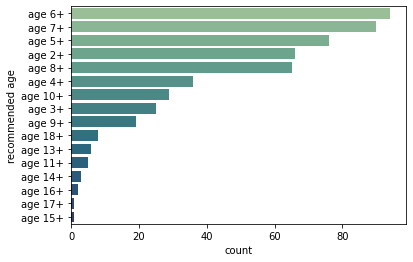

In [71]:
sns.countplot(y=data['recommended age'],order=data['recommended age'].value_counts().index,palette='crest')

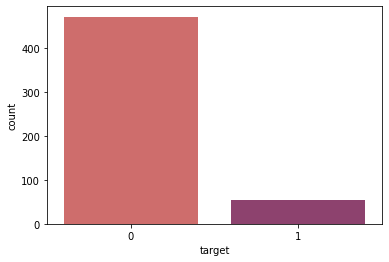

In [72]:
#Seeing distribution of target variable which shows highly imbalanced dataset
sns.countplot(x=data['target'],palette='flare')

# Preprocessing Data

In [10]:
#Preprocessing Data
stopword=set(stopwords.words('english'))
wordnet_lemma=WordNetLemmatizer()

def prerpocessor(text):

  expanded_text=contractions.fix(str(text))
  expanded_text=expanded_text.lower()
  text_filtered=re.sub('[^A-Za-z\s]',"",expanded_text)
  tokens=word_tokenize(text_filtered)
  filtered_stop=[wordnet_lemma.lemmatize(word=w) for w in tokens if w not in stopword]

  cleaned_text=" ".join(filtered_stop)
  return cleaned_text


preprocessor_vect=np.vectorize(prerpocessor)


In [16]:
text_filtered=re.sub('[^A-Za-z\s]',"",data['review'][0])

text_filtered

'Kids dont listent to the parents saying ThIs GaMe HaS sWoRdS tHaT mEaNs ThErE iS vIoLaNcE there is no violance but its good to not play all day play like idk  hoursI think minecraft is a child friendly game and is open to all ages thats my opinion'

In [11]:
data['clean_review']=data['review'].apply(preprocessor_vect)

In [12]:
data.tail()

,author age,recommended age,review,target,clean_review
556,"Teen, 14 years old",age 7+,"Wow. Just wow. Common Sense, THIS GAME IS IN A...",0,wow wow common sense game alpha give time alre...
557,"Teen, 13 years old",age 4+,A quite popular gem on the app store/google pl...,0,quite popular gem app storegoogle play basical...
558,"Kid, 12 years old",age 2+,"It's a abhorrent try by Mojang, though a excel...",0,abhorrent try mojang though excellent idea thi...
559,"Teen, 15 years old",age 6+,Minecraft: Pocket Edition is an app which you ...,0,minecraft pocket edition app download iphone i...
560,"Kid, 11 years old",age 4+,"Give it a little time CommonSense, the game is...",0,give little time commonsense game alpha receiv...


# Splitting Dataset

* Splitting dataset based on stratified on target column to tackle imbalanced dataset.

In [13]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data['clean_review'],data['target'],test_size=0.2,random_state=111,stratify=data.target,shuffle=True)
print(Ytest.value_counts(),'\n',Ytrain.value_counts())

0    95
1    11
Name: target, dtype: int64 
 0    376
1     44
Name: target, dtype: int64


# Text Representation or Vectorization

* We can use Bag of Words approach (COuntVectorizer)
* We can also use TF-IDF approach which is normalised version of Bag of Words approach.

We will compare both vectorization techniques to see which performs better in our case. Generally TF-IDF is considered better as it takes into account document freq as well as term freq to scale out words which are high frequency words.

In [14]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=0.05)
# Create count train and test variables
count_train = count_vectorizer.fit_transform(Xtrain)
count_test = count_vectorizer.transform(Xtest)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=0.05)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(Xtrain)
tfidf_test = tfidf_vectorizer.transform(Xtest)

In [15]:
print('Number of words in vectorizer Count: ',len(count_vectorizer.vocabulary_))
print('Number of words in vectorizer TF-IDF: ',len(tfidf_vectorizer.vocabulary_))
#Displaying the vectorized form in DataFrame TFIDF
pd.DataFrame(tfidf_train.toarray(),columns=tfidf_vectorizer.vocabulary_.keys())

Number of words in vectorizer Count:  85
Number of words in vectorizer TF-IDF:  85


,people,review,game,money,minecraft,amazing,play,server,chat,kill,...,die,food,house,easy,life,let,use,lot,building,buy
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.248206,0.204456,0.0,0.0,0.248206,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.350164,0.000000,0.000000,0.259522,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.292187,0.000000,...,0.0,0.0,0.000000,0.223808,0.296739,0.000000,0.000000,0.000000,0.274232,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
416,0.000000,0.000000,0.194051,0.0,0.0,0.000000,0.0,0.0,0.000000,0.215366,...,0.0,0.0,0.000000,0.000000,0.000000,0.174595,0.000000,0.000000,0.000000,0.0
417,0.122706,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.101449,0.000000,0.105782,0.136686,0.000000,0.000000,0.0
418,0.532677,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [105]:
#Displaying the vectorized form in DataFrame Count Vectorizer
pd.DataFrame(count_train.toarray(),columns=count_vectorizer.vocabulary_.keys())

,people,review,game,money,minecraft,amazing,play,server,chat,kill,...,die,food,house,easy,life,let,use,lot,building,buy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
417,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
418,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [51]:
# define custom functions for machine learning

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def crossvalidate_classifier(model, X, y,cm=False):
    
    scores = cross_val_score(model, X, y, scoring='f1_macro', cv=5)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
    print("%0.2f f-1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    #print("%0.2f Accuracy score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    y_pred = cross_val_predict(model, X, y, cv=5)


    if(cm):
      conf_mat = confusion_matrix(y, y_pred)
      disp=ConfusionMatrixDisplay(conf_mat, display_labels = ['suitable','unsuitable'])
      disp.plot()
      plt.show()
     
    
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
      
    # ... fit your model here ...
    model.fit(X_train,y_train)

    # Run predict on your tfidf test data to get your predictions
    pred = model.predict(X_test)

    # Calculate your accuracy using the metrics module
    acc_score = metrics.accuracy_score(pred, y_test)
    print("Accuracy Score:   %0.3f" % acc_score)
    
    f1score = metrics.f1_score(pred, y_test, average='macro')
    print("F-1 Score:   %0.3f" % f1score)

    # Calculate the confusion matrices for the tfidf_svc model
    #svc_cm = metrics.confusion_matrix(y_test, pred, labels=['fulfillment','other'])

    # Plot the confusion matrix using the plot_confusion_matrix function
    #plot_confusion_matrix(svc_cm, classes = ['fulfillment','other'], title="Confusion Matrix")
    
    return model

# def best_hyperparam(X_train_data, X_test_data, y_train_data, y_test_data, 
#                        model, param_grid, cv=5, scoring_fit='f1_score',
#                        do_probabilities = False):
#     gs = RandomizedSearchCV(
#         estimator=model,
#         param_grid=param_grid, 
#         cv=cv, 
#         n_jobs=-1, 
#         scoring=scoring_fit,
#         verbose=2
#     )
#     fitted_model = gs.fit(X_train_data, y_train_data, epochs=100)
    
#     if do_probabilities:
#       pred = fitted_model.predict_proba(X_test_data)
#     else:
#       pred = fitted_model.predict(X_test_data)
    
#     return fitted_model, pred

## TF-IDF

0.50 f-1 score with a standard deviation of 0.05


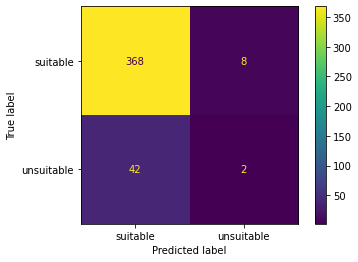

In [52]:
crossvalidate_classifier(RandomForestClassifier(random_state=1200),tfidf_train,Ytrain,cm=True)


0.54 f-1 score with a standard deviation of 0.06


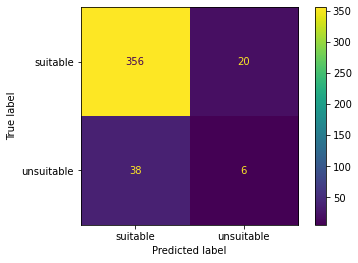

In [59]:
crossvalidate_classifier(GradientBoostingClassifier(random_state=1200,max_depth=15,max_features=0.5),tfidf_train,Ytrain,cm=True)


0.52 f-1 score with a standard deviation of 0.06


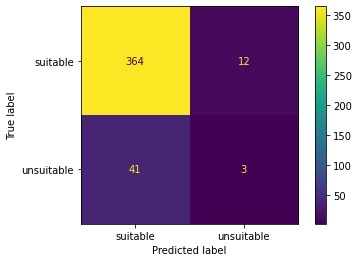

In [62]:
crossvalidate_classifier(RandomForestClassifier(random_state=1200),count_train,Ytrain,cm=True)


0.51 f-1 score with a standard deviation of 0.04


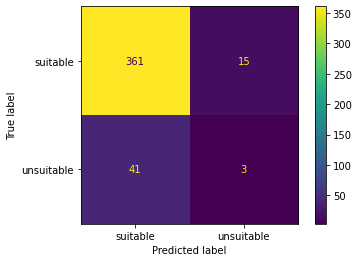

In [63]:
crossvalidate_classifier(GradientBoostingClassifier(random_state=1200,max_depth=15,max_features=0.5),count_train,Ytrain,cm=True)


# Evaluation

In [60]:
evaluate_classifier(RandomForestClassifier(random_state=1200),tfidf_train,tfidf_test,Ytrain,Ytest)


Accuracy Score:   0.896
F-1 Score:   0.549


RandomForestClassifier(random_state=1200)

In [61]:
evaluate_classifier(GradientBoostingClassifier(random_state=1200,max_depth=15,max_features=0.5),tfidf_train,tfidf_test,Ytrain,Ytest)


Accuracy Score:   0.877
F-1 Score:   0.534


GradientBoostingClassifier(max_depth=15, max_features=0.5, random_state=1200)

In [64]:
evaluate_classifier(RandomForestClassifier(random_state=1200),count_train,count_test,Ytrain,Ytest)


Accuracy Score:   0.915
F-1 Score:   0.677


RandomForestClassifier(random_state=1200)

In [65]:
evaluate_classifier(GradientBoostingClassifier(random_state=1200,max_depth=15,max_features=0.5),count_train,count_test,Ytrain,Ytest)


Accuracy Score:   0.915
F-1 Score:   0.631


GradientBoostingClassifier(max_depth=15, max_features=0.5, random_state=1200)

# Conclusion

From above evaluation results we can see that count vectorizer is performing better than TF-IDF in this case . Giving an accuracy of 91% and F1 score of 67%.

*Further work*

We can further improve our model using Grid Search For hyperparameter tuning .